In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap, collation_tools as ct, file_find as ff
from synthesis import hvc_looper as hvcl, magnetic_field_derivation as mfd, KStest

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits", override_RMs=True)

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [2]:
from wcs import image_transform as it
from astropy.coordinates import SkyCoord
import astropy.units as u

#dx = selected_HVC['dx']
#dy = selected_HVC['dy']

# Twice the area of the HVC to ensure it's including all of the HVCs
di = 7.5 * u.deg

centre_coord = SkyCoord(l=42*u.deg, b=-16*u.deg, frame="galactic")

# Calculate upper corner coordinate
new_coord_up = SkyCoord(centre_coord.l+di, centre_coord.b+di, frame='galactic')
new_coord_down = SkyCoord(centre_coord.l-di, centre_coord.b-di, frame='galactic')

coord_set = [new_coord_down, new_coord_up, centre_coord]

print(coord_set)

[<SkyCoord (Galactic): (l, b) in deg
    (34.5, -23.5)>, <SkyCoord (Galactic): (l, b) in deg
    (49.5, -8.5)>, <SkyCoord (Galactic): (l, b) in deg
    (42., -16.)>]


[3727, 976]
[3907, 796]


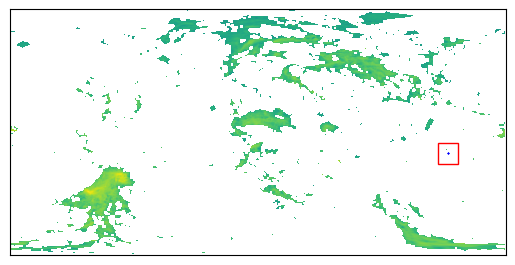

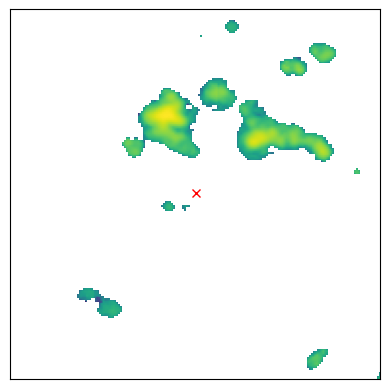

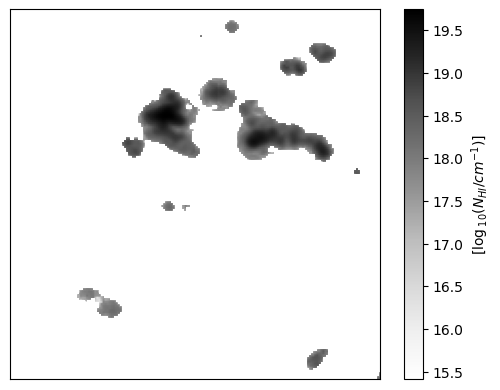

In [4]:
smith_HI, _ = snap.crop_wcs(coord_set, collated_data["HI"], plot=True)

from plotting import honours_plot as hplt

hplt.plot_fits(smith_HI)

In [5]:
import numpy as np

hvcs = ff.get_HVC_locations(load_file='../data_catalog/vizier_Moss2013_HVCs.vot', hvc_area_range=None, full_hvc_range=True, override=False)

mask = []
for hvc in hvcs:
    mask.append("125" in hvc["Name"])

mask = np.array(mask)

hvcs_mask = hvcs[mask]

hvcs_mask

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G003.7-09.6+125,"278.22095097359636,-30.264450276868132",18 32 53.03,-30 15 52,125.9,3.5,140.2,73.4,23.2,0.18,7e+18,2e+18,0.3,0.4,1.4,T,,,Simbad,35,GHVC
G010.8+19.3-125,"255.28790966030647,-9.517226926808124",17 01 09.10,-09 31 02,-125.3,1.1,-86.4,-82.8,13.5,0.35,9e+18,1e+18,0.8,1.5,1.3,H2,HVC 010.6+19.5-131,N,Simbad,106,GHVC
G021.6-58.4-125,"337.0484542138416,-28.64083781657005",22 28 11.63,-28 38 27,-125.3,5.7,-82.8,-87.8,21.7,0.10,6e+18,2e+18,0.4,1.4,0.9,H2,HVC 021.5-58.4-130,"N,MS_MS",Simbad,188,GHVC
G032.9-15.5-125,"296.80803533470925,-7.014450518145529",19 47 13.93,-07 00 52,-125.2,4.8,-10.0,-82.7,19.4,0.11,4e+18,2e+18,0.1,0.3,0.5,H1,HVC 033.0-15.6-128,N,Simbad,286,GHVC
G125.0-71.3-285,"13.545744530524441,-8.500001162737469",00 54 10.98,-08 30 00,-285.4,3.8,-227.8,-252.9,18.6,0.13,5e+18,2e+18,0.2,0.8,0.3,H1,CHVC 125.1-71.3-281,"EN,MS_MS",Simbad,425,GHVC
G263.2-63.0+125,"37.38049973902308,-45.82416531934846",02 29 31.32,-45 49 27,125.5,3.2,26.4,88.0,23.6,0.20,9e+18,2e+18,0.8,1.9,2.4,H1,HVC 262.8-63.1+127,"P,MS_MS",Simbad,736,GHVC
G288.1-58.1+125,"27.262961410418644,-57.246666381505484",01 49 03.11,-57 14 48,125.5,1.0,15.3,88.0,13.5,0.46,1e+19,1e+18,0.3,0.9,0.7,T,,"P,MS_MS",Simbad,1013,GHVC
G302.2-14.3+125,"189.75792604682778,-77.22916511234125",12 39 01.91,-77 13 45,125.1,2.6,-55.2,82.6,17.0,0.18,6e+18,2e+18,0.4,0.6,0.8,H1,,P,Simbad,1160,GHVC
